In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor

样本数据是连续的，不可以划分为两类，最后趋于一个值

In [97]:
x = np.linspace(0, 2*np.pi, 40)
y = np.sin(x)

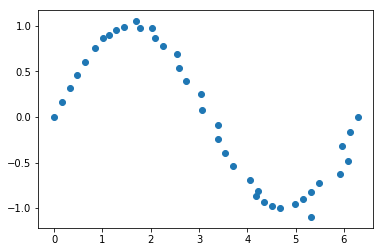

In [20]:
noise = np.random.random(size=20) * 0.01 - 0.03

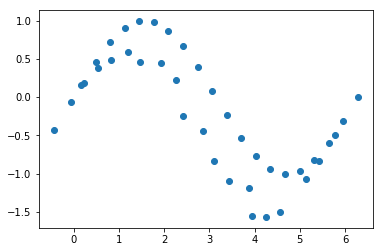

In [107]:
np.random.seed(0)
x = np.linspace(0, 2*np.pi, 40)
y = np.sin(x)

noise = np.random.random(size=20) * 0.3 - 0.6

x[::2] += noise
y[::2] += noise

X_train = x
y_train = y

plt.scatter(X_train, y_train)

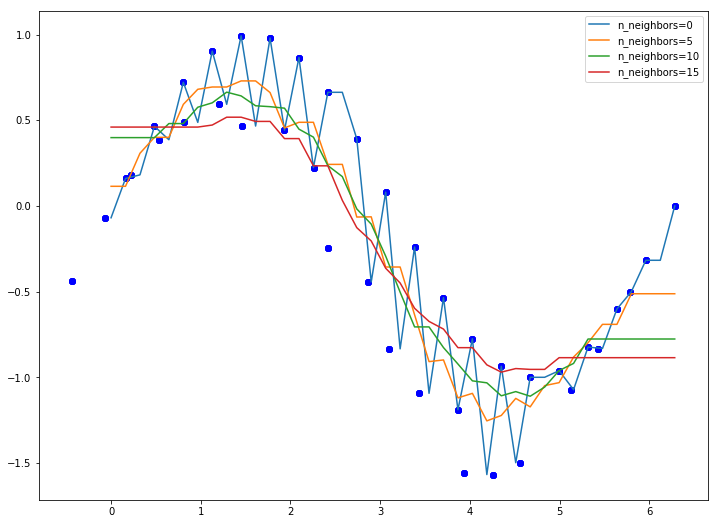

In [115]:
plt.figure(figsize=(12,9))
for i in range(0, 20, 5):
    
    knn = KNeighborsRegressor(i+1)
    knn.fit(X_train.reshape(40,1), y_train)
    X_test = np.linspace(0, 2*np.pi, 40)
    y_ = knn.predict(X_test.reshape(40, 1))
    
    plt.plot(X_test, y_, label="n_neighbors=%d" % i)
    plt.scatter(X_train, y_train, c="b")
plt.legend()

## 工资分析

In [4]:
adults = pd.read_csv("./salary.txt")

In [5]:
adults.head()

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [29]:
train = adults[["age","workclass","education_num","occupation","hours_per_week","sex"]].copy()
target = adults["salary"].copy()

In [30]:
train.dtypes

age                int64
workclass         object
education_num      int64
occupation        object
hours_per_week     int64
sex               object
dtype: object

 特这选择，通过运算进行选择，方差接近零，
表示数据波动小，数据就没有意义  

特征提取，主管意愿进行筛选

In [31]:
# 独热编码，或者自定义字典进行映射

workcalss = train["workclass"].unique()
sex = train["sex"].unique()
occupation = train["occupation"].unique()

In [38]:
# def transporm(column):
#     train[column] = train[column].map(map_workcalss)

def map_workcalss(item):
    index = np.argwhere(sex == item)[0,0]
    return index

In [33]:
train["workclass"] = train["workclass"].map(map_workcalss)

In [39]:
train["sex"] = train["sex"].map(map_workcalss)

# train["occupation"] = train["occupation"].map(map_workcalss)


In [40]:
train.head()

,age,workclass,education_num,occupation,hours_per_week,sex
0,39,0,13,0,40,0
1,50,1,13,1,13,0
2,38,2,9,2,40,0
3,53,2,7,2,40,0
4,28,2,13,3,40,1


In [41]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(train, target)

In [54]:
from sklearn.neighbors import KNeighborsClassifier

In [55]:
knn = KNeighborsClassifier()

In [56]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [57]:
knn.score(X_test, y_test)

0.7798796216680998

In [74]:
train.product

<bound method DataFrame.prod of        age  workclass  education_num  occupation  hours_per_week  sex
0       39          0             13           0              40    0
1       50          1             13           1              13    0
2       38          2              9           2              40    0
3       53          2              7           2              40    0
4       28          2             13           3              40    1
5       37          2             14           1              40    1
6       49          2              5           4              16    1
7       52          1              9           1              45    0
8       31          2             14           3              50    1
9       42          2             13           1              40    0
10      37          2             10           1              80    0
11      30          0             13           3              40    0
12      23          2             13           0          

In [59]:
df1 = pd.crosstab(adults.salary, adults.occupation)

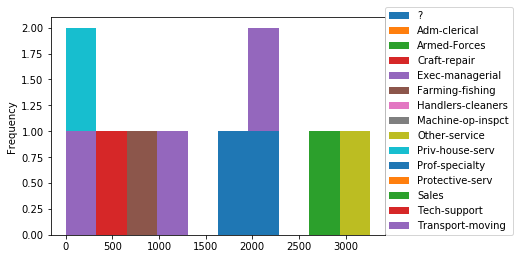

In [71]:
df1.plot(kind="hist")

plt.legend(loc=(1,0))